# Projet d'expansion à l’international de l’entreprise EdTech Academy

## Résumé 
Academy, une start-up de la EdTech qui propose des contenus de formation en ligne pour un public de niveau lycée et université,
envisage une expansion internationale pour assurer une croissance à long terme.

Différent d'un marché intérieur qui l'on a la maîtrise du comportements des consommateurs, l’expansion internationale comporte des risques en particulier lorsque les pays cibles ont un environnement culturel inconnu. Cela dit, il y a des raisons impérieuses d'une analyse exploratoire en préalable. 

L'objectif principal de cette étude est d'analyser les données sur l’éducation de la banque mondialeles données pour déterminer leur pertinance à informer les décisions d'ouverture vers de nouveaux pays. Pour atteindre cette objectif, la mission sera organisé autour des questions suivantesle projet sera organisé autour des questions suivantes
<ol>
<li> Quels sont les pays avec un fort potentiel de clients pour nos services ?</li>
<li> Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?</li>
<li> Dans quels pays l'entreprise doit-elle opérer en priorité ?</li>
</ol>

Pour répondre à ces questions, les étapes suivantes seront mises en œuvrepour:
<ol>    
<li> Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)</li>
<li> Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)</li>
<li> Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)</li>
<li> Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)</li>
</ol> 

## Méthode    

### Importations de bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import copy
import random
import warnings
warnings.simplefilter(action='ignore', category=Warning)


### Les fonctions utilisée 

In [2]:
def plot_function(x, y, plot_type,figure_name,xlabel_name,ylabel_name,plot_legend):
    fig, ax   = plt.subplots(figsize=(24, 8))

    ax.plot(x, y, marker = plot_type)
    if len(figlegend)<6:
           ncol = len(figlegend)
    else:
           ncol =int(len(figlegend)/2)
           
    plt.legend(figlegend, ncol =ncol, loc='upper center',bbox_to_anchor=(0.5, 1.2))
    ax.set_xlabel(xlabel_name,fontsize=18)
    ax.set_ylabel(ylabel_name,fontsize=18)
    plt.rcParams['font.size'] = '18'
    plt.grid(color='k', linestyle='-', linewidth=.1)
    fig.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')
  

In [3]:
def norm_R(df):
    import copy
    df1 = copy.deepcopy(df)
    desc =  [i.describe(include='all') for i in df]
    for inc, indicator in enumerate(df):
        Min=desc[inc].loc['min'].min()
        Max=desc[inc].loc['max'].max()
        for i in indicator.keys():
            df1[inc][i] =  (indicator[i]- Min)/(Max-Min)
    return df1

In [4]:
def indicator_weight_Sum(df,col,ind):
    df1=pd.DataFrame(index=ind, columns=col)
    df1.values[:] = 0
    for i in df1.keys():
        for indicator in df:
            df1[i] =df1[i] + indicator[i]
    return df1

In [5]:
def plot_bar_all(df,kind,ylabel,xlabel,figure_name):
    nb=len(df)
    all_colors = list(plt.cm.colors.cnames.keys())
    #print(all_colors)
    random.seed(100)
    c = random.choices(all_colors, k=nb)
   
    fig,ax   = plt.subplots(figsize=(24, 8))
    ax = df.plot(kind=kind,figsize=(24, 8), color=c,fontsize=18) 
    ax.set_xlabel(xlabel,fontsize=18)
    ax.set_ylabel(ylabel,fontsize=18)
    plt.grid(color='k', linestyle='-', linewidth=.1)
    fig.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [6]:
def plot_box_plot(df,xlabel_name,ylabel_name):
    color = dict(boxes='black', whiskers='black', medians='red', caps='black')
    ax = df.plot.box(color=color,whiskerprops = dict(linestyle='-',linewidth=2.0, color='black'),figsize=(24, 8),fontsize=18)
    ax.set_xlabel(xlabel_name,fontsize=18)
    ax.set_ylabel(ylabel_name,fontsize=18)
    plt.grid(color='k', linestyle='-', linewidth=.1)
    plt.xticks(rotation=90)
    ax.label_outer() 

    plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')
  

In [7]:
def plot_bar_fixed_color(df,kind,ylabel,xlabel,figure_name,c,yrange,ymin):
    fig,ax   = plt.subplots(figsize=(24, 8))
    ax = df.plot(kind=kind,figsize=(24, 8), color=c,fontsize=18) 
    ax.set_xlabel(xlabel,fontsize=18)
    ax.set_ylabel(ylabel,fontsize=18)
    plt.grid(color='k', linestyle='-', linewidth=.1)
    fig.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')
    plt.ylim(yrange)
    plt.axhline(y=ymin, color='black', linestyle='-', linewidth=4)

In [8]:
def plot_bar_fixed_color_twins(df1,df2,kind,ylabel1,ylabel2,xlabel,figure_name,c,y1range,y2max,ymin,loc):
    fig = plt.figure(figsize=(24, 8)) 

    ax1 = fig.add_subplot(111) 
    ax2 = ax1.twinx() 

    width = 0.4

    h1=df1.plot(kind=kind, color=c, ax=ax1, width=width, position=1, label = ylabel1, edgecolor="w")
    h2=df2.plot(kind=kind, color=c, ax=ax2, width=width, position=0, label = ylabel2, edgecolor="w")

    ax1.set_ylabel(ylabel1,fontsize=18)   
    ax2.set_ylabel(ylabel2,fontsize=18)
    ax1.set_xlabel(xlabel,fontsize=18)
    plt.rcParams['font.size'] = '18'
    plt.grid(color='k', linestyle='-', linewidth=.1)

    ax1.set_ylim(y1range);
    ax2.set_ylim(df2.min(),y2max);
    ax2.axhline(y=ymin, color='black', linestyle='-', linewidth=4)

# where some data has already been plotted to ax
    handles, labels = ax1.get_legend_handles_labels()
# manually define a new patch 
    rectangle = Rectangle((0,0), 1, 1, color='blue',ec='k',label=y2label) 
# handles is a list, so append manual patch
    handles.append(rectangle) 

    plt.legend(handles=handles, loc=loc)

    plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')


In [9]:
import urllib.request
url = "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/" +\
             "files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/" +\
             "Projet+Python_Dataset_Edstats_csv.zip"
urllib.request.urlretrieve(url, './Projet+Python_Dataset_Edstats_csv.zip')

('./Projet+Python_Dataset_Edstats_csv.zip',
 <http.client.HTTPMessage at 0x11af59e50>)

### Telechargement des données

In [10]:
from zipfile import ZipFile, Path

with ZipFile("/Users/yjose/Desktop/Data_scientist/P2_JOSE_Yonss/Projet+Python_Dataset_Edstats_csv.zip") as myzip:
    data1 = myzip.open("EdStatsData.csv")
    data2 = myzip.open("EdStatsCountry.csv")                       
df = pd.read_csv(data1)
df_country = pd.read_csv(data2)

pd.set_option("display.precision", 2)          
pd.set_option("display.max.columns", None)    
pd.set_option("display.max.rows", None)        

### Informations (résumé) sur le DataFrame

In [11]:
##======= Apprenez à connaître vos données 
df.info()
print('La forme est : ', df.shape)
print('La longueur est : ', len(df))
print('Le type est : ', type(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [12]:
#print(df.head())
df.head().T.to_excel("FIGURES/e.xlsx") 
print(df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')


In [13]:
Number_Nan = df.isna().sum().sum() 
Total = df.values.shape
print(100*Number_Nan/np.prod(Total))

86.09985165522806


### Suppression de colonnes inutiles

In [14]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]   

### Choix des indicateur pertinent pour l'analyse exploratoire
 

In [15]:
TPop  = df.loc[df['Indicator Name'] == 'Population, total']
gdp   = df.loc[df['Indicator Name'].str.contains('GDP per capita, PPP (current international', regex=False)]

Inter = df.loc[df['Indicator Name'].str.contains('Internet users', regex=False)]
Pcomp = df.loc[df['Indicator Name'].str.contains('Personal computers', regex=False)]
##
Enrolsec = df.loc[df['Indicator Name'].str.contains('Enrolment in secondary education, both sexes', regex=False)]
Enrolter = df.loc[df['Indicator Name'].str.contains('Enrolment in tertiary education, all programmes, both sexes', regex=False)]

 On recompose  tous les indicateurs

In [16]:
indicators = [TPop, gdp, Inter, Pcomp, Enrolsec, Enrolter]


On uniformise les indexes

In [17]:
kx = indicators[0].T.columns
indicators = [i.set_axis(range(0,len(kx)), axis=0) for i in indicators]

### Nettoyage des données et statistiques de base 

In [18]:
desc =  [i.describe(include='all') for i in indicators]

In [19]:
Count = pd.DataFrame([i.loc['count'] for i in desc] ).iloc[:,4:]
Count = Count.T
kw = Count.columns
bds = range(0,len(kw))
Count.columns = list(bds)
Count.rename(columns  = {0: "TPop", 1: "gdp", 2: "Internet", 3:"P. computers", 4:  "Enrol. secundary", 5: "Enrol. tertiary"},  inplace = True)
years = [int(i) for i in indicators[0].iloc[:,4:].keys()]

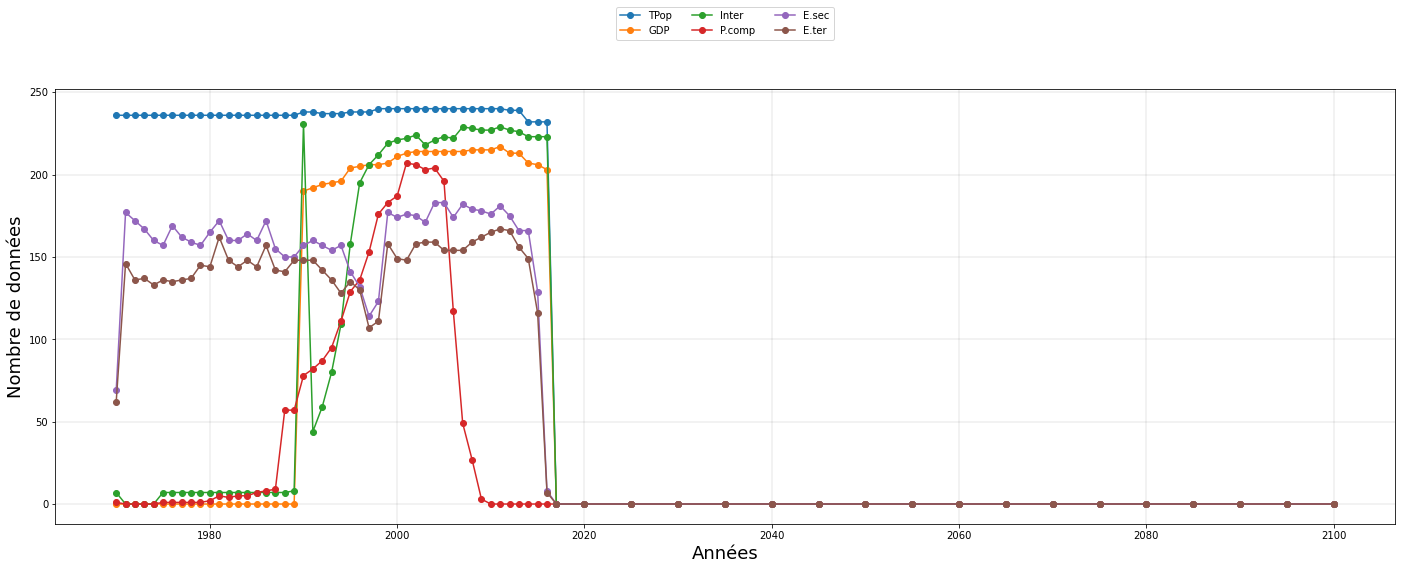

In [20]:
figname  = 'FIGURES/Count_of_all_indicators_1970_2100.jpeg'
figlegend= ['TPop','GDP','Inter','P.comp','E.sec','E.ter']
xlabel   = "Années"
ylabel   = "Nombre de données"
figtype  = "o"

ax       = plot_function(years, Count, figtype, figname, xlabel ,ylabel,figlegend)

A l'exception de l'indicateur "Personal computers", tous autres indicateur ont des donnees jusqu'a 2016. En plus de cela, le nombre de données dans " Enrolment in secondary education et "Enrolment in tertiary education" diminuent considérablement de 2014 à 2015. Nous allons donc ignorer les données à compter de 2015.

In [21]:
mask = (Count['Enrol. secundary'] > 150)

Count0 = Count[mask]               
years0 = np.array(years)[mask]


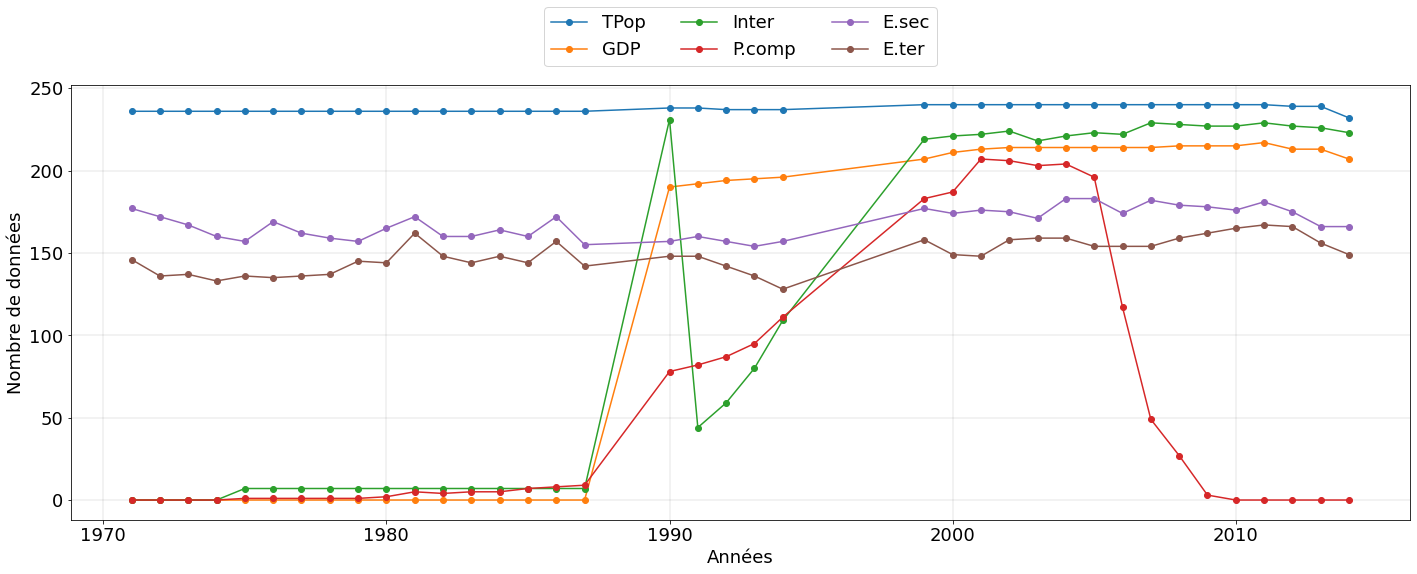

In [22]:
#========= Figure =======================================
figname  = 'FIGURES/Count_of_all_indicators_1970_2016.jpeg'
ax       = plot_function(years0, Count0, figtype, figname, xlabel ,ylabel,figlegend)

De même, il y a un manque de données sur les utilisateurs d'Internet et le PIB avant 1990. De plus, les données plus anciennes peuvent ne pas être importantes pour déduire les tendances futures de la dynamique de la population et de l'éducation. Nous allons donc concentrer notre analyse sur les 10 dernières années. 

In [23]:
mask1 = (years0 > 2006)
Count1 = Count0[mask1]               
years1 = np.array(years0)[mask1]

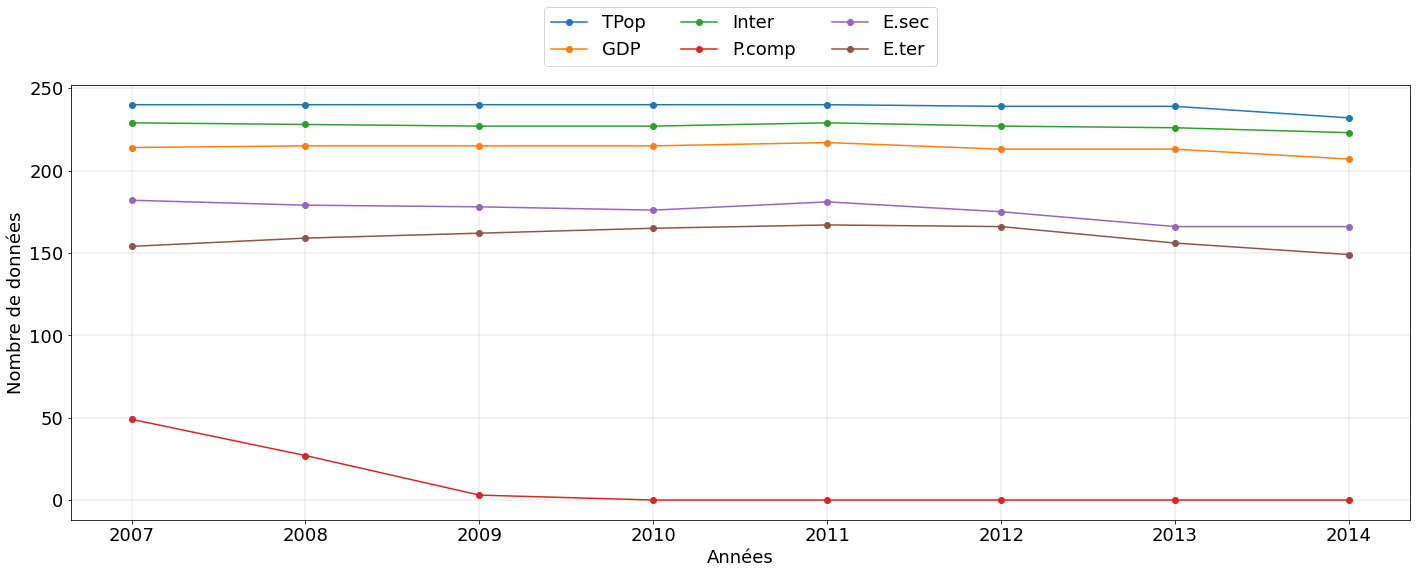

In [24]:
#========= Figure =======================================
figname  = 'FIGURES/Count_of_all_indicators1_2006_2014.jpeg'

ax       = plot_function(years1, Count1, figtype, figname, xlabel ,ylabel,figlegend)

Bien que l'indicateur "Personal computers" soit important pour notre étude, nous l'abandonnerons en raison du manque de données dans la dernière décennie de la period plus interessante pour le projet.

In [25]:
indicators = [TPop, gdp, Inter, Enrolsec, Enrolter]
indicators = [i.set_axis(range(0,len(kx)), axis=0) for i in indicators]


On sélectionne uniquement les pays et on  ignore les régions. Les noms  de ces pays sont écrits différement en EdStatsData.csv et EdStatsCountry.csv. On les uniformise. On remplace  les noms des indexes pars les codes des pays

In [26]:
SCTregion     = df_country['Short Name']
currency_unit = df_country['Currency Unit']
indxx         =~currency_unit.isna()
SCTregion     = df_country['Short Name'][indxx]

SCTregion[21] = 'Bahamas'
SCTregion[29] = 'Brunei'
SCTregion[38] = "Cote d'Ivoire"
SCTregion[47] = 'Curacao'
SCTregion[62] = 'gypt, Arab Rep.'
SCTregion[72] = 'Faroe Islands'
SCTregion[73] = 'Micronesia, Fed. Sts.'
SCTregion[80] = 'Gambia, The'
SCTregion[100] = 'Iran, Islamic Rep.'
SCTregion[114] = 'Korea, Rep.'
SCTregion[144] = 'Macedonia, FYR'
SCTregion[178] = 'Korea, Dem. People’s Rep.' 
SCTregion[185] = 'Russian Federation'
SCTregion[201] = 'Sao Tome and Principe'
SCTregion[230] = 'Venezuela, RB'
SCTregion[231] = 'Virgin Islands '
SCTregion[237] = 'Yemen, Rep.'
SCTregion[134] = "St. Martin " 
SCTregion[207]  = "Sint Maarten "

indx          = indicators[0]['Country Name'].str.contains('|' .join(SCTregion))
Cindicators   = [indicator[indx] for indicator in indicators]

Yl                    = indicators[0]['Country Code'][indx]
Full_region_name      = Cindicators[0]['Country Name']
Full_region_name_Code = Yl + ' --- ' + Full_region_name
#
Cindicators = [indicator.iloc[:,4:] for indicator in Cindicators]
Cindicators = [indicator.T[mask] for indicator in  Cindicators]
Cindicators = [indicator[mask1] for indicator in  Cindicators]

for i, indicator in  enumerate(Cindicators):
    Cindicators[i].columns = Yl.values

In [27]:
Number_Nan= [indicator.isna().sum().sum() for indicator in Cindicators]
Total     = [indicator.values.shape  for indicator in Cindicators]
#
Number_Nan
Total     = [np.prod(ind) for ind in Total]
Total =Total[1]
Number_Nan= [100*ind/Total for ind in Number_Nan]
print('Indicateurs retenue: ' ,"Population total," ,"GDP per capita (PIB),", "Utilisateurs internet," \
      ,"Inscription dans l'enseignement secondaire,", "Inscription dans l'enseignement secondaire")
print('Number of NaN sont   ', Number_Nan)


Indicateurs retenue:  Population total, GDP per capita (PIB), Utilisateurs internet, Inscription dans l'enseignement secondaire, Inscription dans l'enseignement secondaire
Number of NaN sont    [0.4069767441860465, 12.093023255813954, 5.872093023255814, 30.697674418604652, 37.383720930232556]


In [28]:
Min_ind= [indicator.min().min() for indicator in Cindicators]
Max_ind= [indicator.max().max() for indicator in Cindicators]
print('Indicateurs retenue: ' ,"Population total," ,"GDP per capita (PIB),", "Utilisateurs internet," \
      ,"Inscription dans l'enseignement secondaire,", "Inscription dans l'enseignement secondaire")
print('Ordre de grandeur:    Min  sont ', Min_ind)
print('Ordre de grandeur:    Max  sont ', Max_ind)

Indicateurs retenue:  Population total, GDP per capita (PIB), Utilisateurs internet, Inscription dans l'enseignement secondaire, Inscription dans l'enseignement secondaire
Ordre de grandeur:    Min  sont  [10243.0, 542.061728658384, 0.0, 1201.0, 2.0]
Ordre de grandeur:    Max  sont  [1364270000.0, 140037.115597332, 98.16, 129438992.0, 41924200.0]


## Analyse des données

On procède à une opération de normalisation pour exprimer les valeurs des indicateus (que ont des unité hétérogènes) en une unité de mesure commune. On procede ensuite à l’agrégation des indicateurs

In [29]:
col = Cindicators[0].columns
ind = Cindicators[0].index

In [30]:
Cindicators_Norm=norm_R(Cindicators)
for i in range(len(Cindicators_Norm)):
    Cindicators_Norm[i].values[pd.isna(Cindicators_Norm[i])]=0 


In [31]:
Min_ind= [indicator.min().min() for indicator in Cindicators_Norm]
Max_ind= [indicator.max().max() for indicator in Cindicators_Norm]
print('Ordre de grandeur:    Min après norm  est ', Min_ind)
print('Ordre de grandeur:    Max après norm   est ', Max_ind)

Ordre de grandeur:    Min après norm  est  [0.0, 0.0, 0.0, 0.0, 0.0]
Ordre de grandeur:    Max après norm   est  [1.0, 1.0, 1.0, 1.0, 1.0]


In [32]:
T_indicator  = indicator_weight_Sum(Cindicators_Norm,col,ind)
P_indicator  = indicator_weight_Sum(Cindicators_Norm[1:],col,ind)

T_indicator = T_indicator.reindex(sorted(T_indicator.columns), axis=1)
P_indicator = P_indicator.reindex(sorted(P_indicator.columns), axis=1)


### Analyse des indicateurs à l'échelle régionale
On procède à la séparation des pays par région. Les pays sont groupée en 6 régions: l'Amérique du Nord (North America), l'Europe et Asie centrale (Europe & Central Asia), l'Asie du Sud (South Asia), Afrique sub-saharienne (Sub-Saharan Africa), Moyen-Orient et de l'Afrique du Nord  (Middle East & North Africa), Amérique latine et Caraïbes (Latin America & Caribbean) et l'est d'Asie et du Pacifique (East Asia & Pacific). Gibraltal n'apparaît dans aucune région. On change donc sa région de NaN à Europe & Central Asie et on met à jour le dataframe df_country. On calcule la ratio des indicateurs en prendre en compte or pas de l'indicateur population total. Le but est de voir si les indicateurs des pays plus peuplés ne sont pas amplifié par cette information. 

In [33]:
# 
Currency= df_country['Currency Unit']
Cu      = df_country['Region']
rindxx =~Currency.isna()
# 
region = df_country['Region']
region =region[rindxx]
region =region.fillna('Europe & Central Asia')
df_country['Region']=region
CCode  = df_country['Region'].isin(region)
CName  = df_country['Country Code'][CCode]
SName  = df_country['Short Name'][CCode]
CR     = df_country['Region'][CCode]
 
CName = [str(i) for i  in CR]

# Ratio des indicateurs en prendre en compte tous les indicateurs
data_modif = T_indicator.T
data_modif['Regions'] = pd.Series(CName, index=data_modif.index)

# Ratio des indicateurs sans prendre en compte l'indicateur population
data_modif_P = P_indicator.T
data_modif_P['Regions'] = pd.Series(CName, index=data_modif_P.index)

In [34]:
# Summe de tous les ratio des indicateurs 
Mean_index_by_region = data_modif.groupby(['Regions']).sum()/data_modif.groupby(['Regions']).count()
data_plot = Mean_index_by_region.T
global_region = data_plot.mean()
global_region.sort_values(inplace=True, ascending=False)

# Summe de tous les ratio des indicateurs sans prendre en compte l'indicateur population
Mean_index_by_region_P = data_modif_P.groupby(['Regions']).sum()/data_modif_P.groupby(['Regions']).count()
data_plot_P = Mean_index_by_region_P.T

In [ ]:
data_modif.groupby(['Regions']).mean()

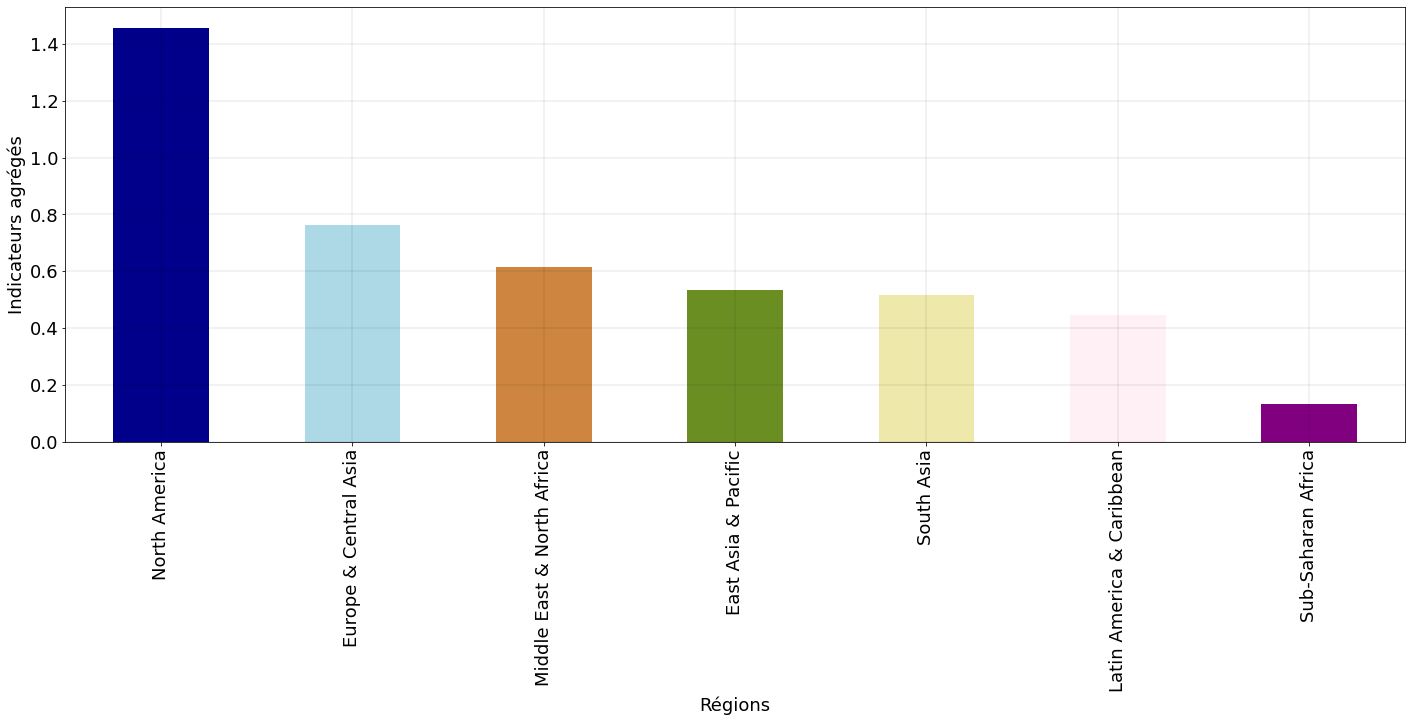

In [35]:
figure_name ='FIGURES/Indic_agrege_regional.jpeg'

kind ="bar"
ylabel = "Indicateurs agrégés"
xlabel = "Régions"
plot_bar_all(global_region,kind,ylabel,xlabel,figure_name)
  


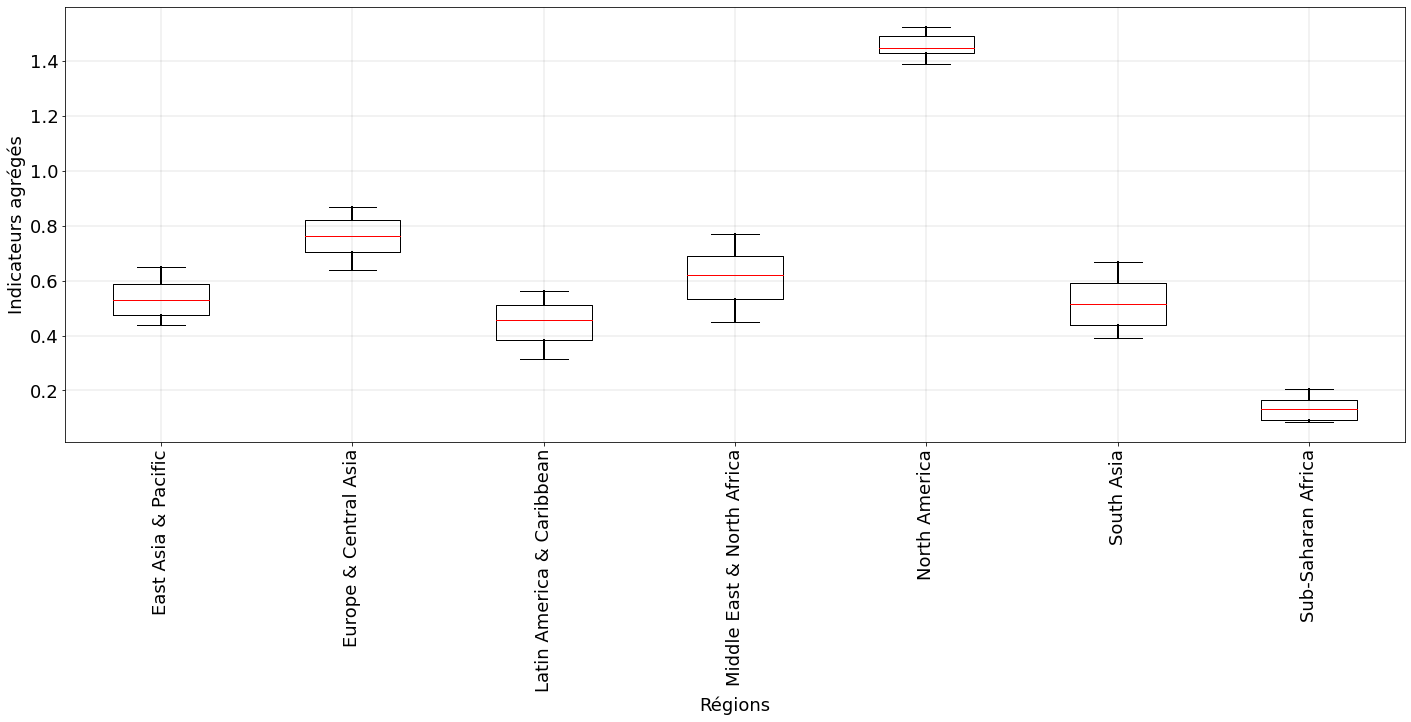

In [36]:
figure_name ='FIGURES/Indic_agrege_regional_with_stats.jpeg'

ylabel = "Indicateurs agrégés"
xlabel = "Régions"
ax = plot_box_plot(data_plot,xlabel,ylabel)

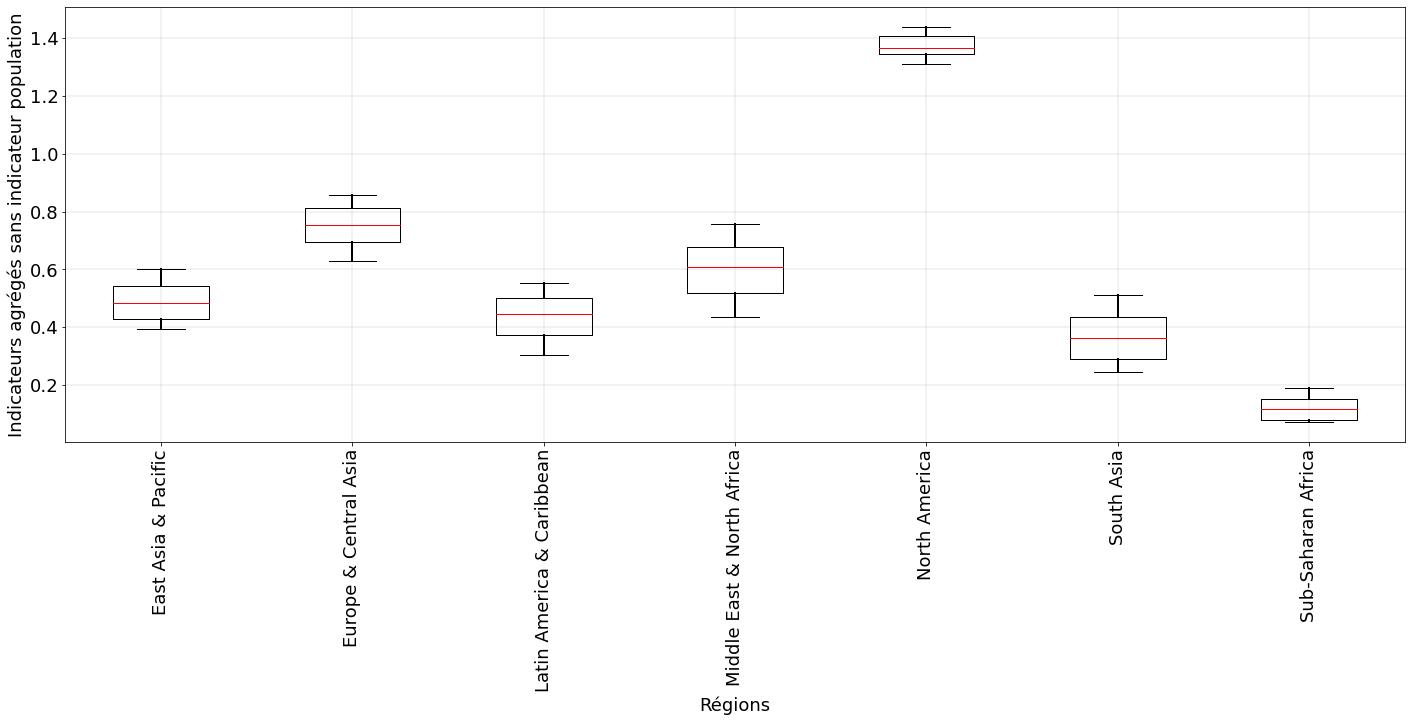

In [37]:
figure_name ='FIGURES/Indic_agrege_regional_with_stats_without_pop.jpeg'

ylabel = "Indicateurs agrégés sans indicateur population"
xlabel = "Régions"
ax = plot_box_plot(data_plot_P,xlabel,ylabel)  

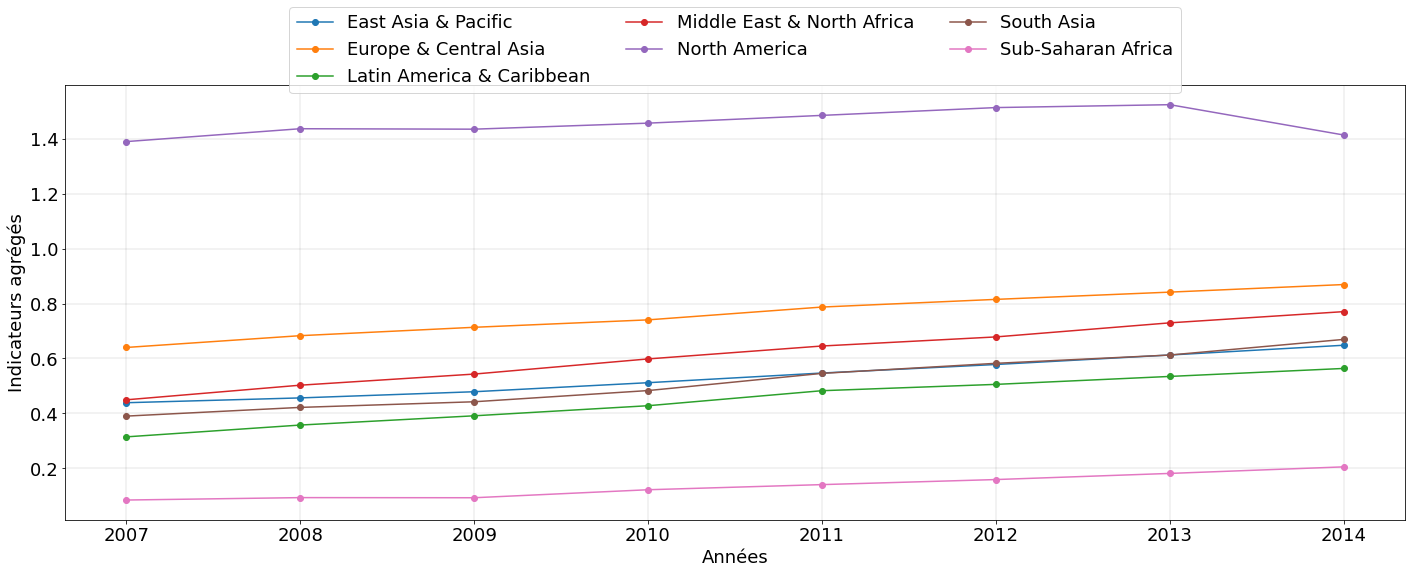

In [38]:
#========= Figure ======================================= 

figname ='FIGURES/Indic_agrege_regional_with_annual_variability.jpeg'
ylabel = "Indicateurs agrégés"
xlabel = "Années"
figlegend = data_plot.columns
#
ax       = plot_function(years1,data_plot, figtype, figname, xlabel ,ylabel,figlegend)


L'Amérique du Nord, l'Europe & Asie centrale, le Moyen-Orient & de l'Afrique du Nord et la région de l'est d'Asie et du Pacifique apparaissent comme les meilleures région pour implémenter l'entreprise. En utilisant ou non la population comme indicateur, les résultats ne changent pas beaucoup. La seul différence réside dans le placement de la région South Asia et la région Latin America & Caribbean. 

### Analyse des indicateurs par pays 
#### Région de l'Amérique du Nord

In [39]:
NA = data_modif['Regions'].str.contains('North America')
NA = data_modif[NA]
NA=NA.T
NA=NA.drop(['Regions'], axis=0)

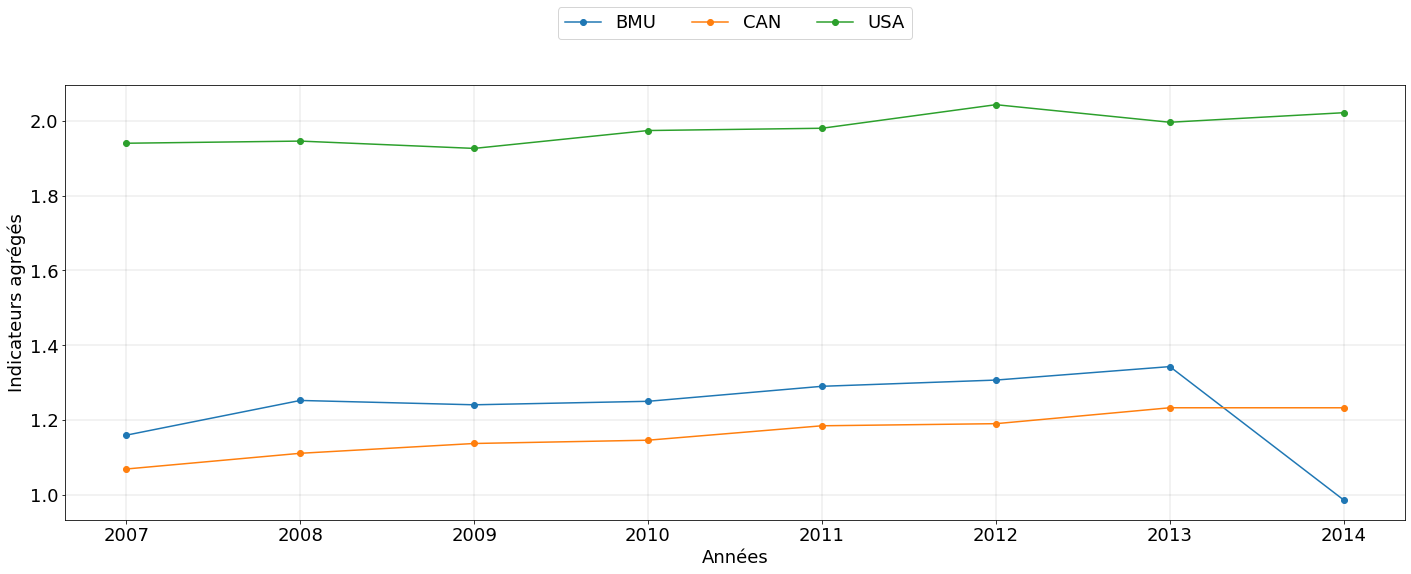

In [40]:
#========= Figure =======================================
figname  = 'FIGURES/North_america_countries.jpeg'
figlegend= NA.columns
xlabel   = "Années"
ylabel   = "Indicateurs agrégés"
figtype  = "o"

ax       = plot_function(years1,NA, figtype, figname, xlabel ,ylabel,figlegend)

Les États-Unis d'Amérique (USA) apparaît comme le meilleur pays pour mettre en œuvre l’entreprise

####  Région de l'Europe et Asie centrale

In [41]:
EU = data_modif['Regions'].str.contains('Europe & ')
EU = data_modif[EU]
EU=EU.T
EU=EU.drop(['Regions'], axis=0)
MEU =EU>1.4*EU.mean().mean()
EU=EU[MEU]
EU = EU.dropna(axis=1)


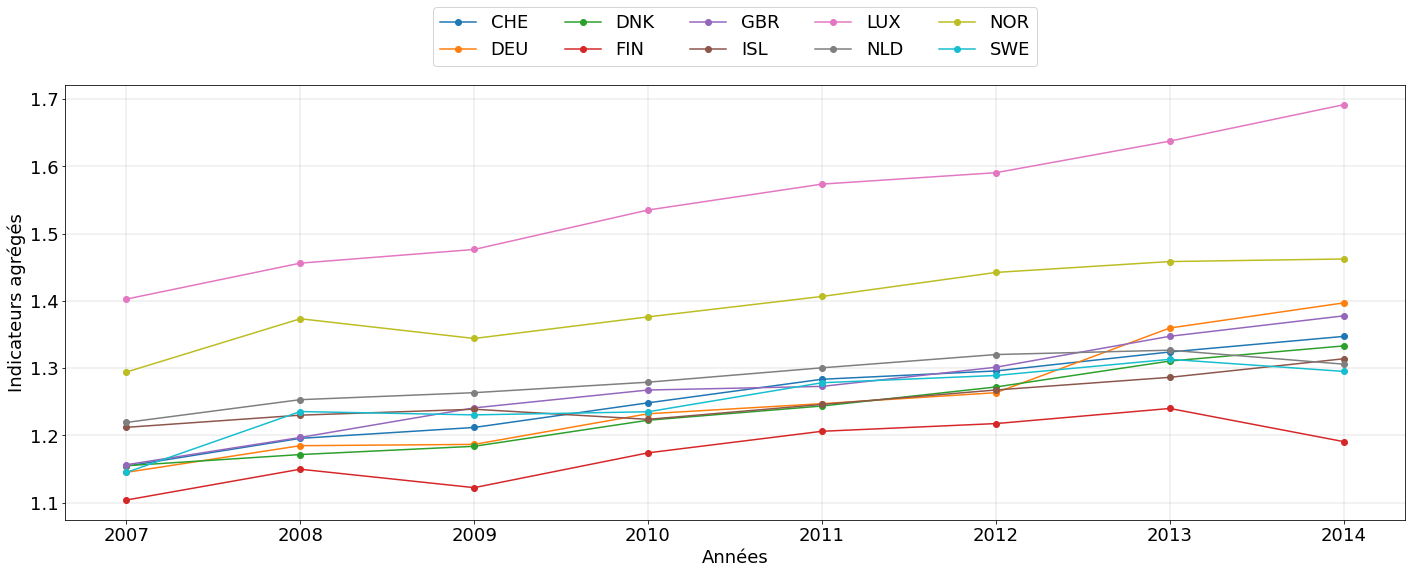

In [42]:
#========= Figure =======================================
figname  = 'FIGURES/Europe_asia_countries.jpeg'
figlegend= EU.columns
xlabel   = "Années"
ylabel   = "Indicateurs agrégés"
figtype  = "o"

ax       = plot_function(years1,EU, figtype, figname, xlabel ,ylabel,figlegend)

In [43]:
cc=df_country['Country Code'].isin(figlegend)
SN  = df_country['Short Name'][cc]
CN  = df_country['Country Code'][cc]
d = {'Code': CN,'Name': SN}

df_n = pd.DataFrame(data=d)
print(df_n)

    Code            Name
34   CHE     Switzerland
51   DEU         Germany
54   DNK         Denmark
69   FIN         Finland
75   GBR  United Kingdom
102  ISL         Iceland
131  LUX      Luxembourg
163  NLD     Netherlands
164  NOR          Norway
205  SWE          Sweden


Le Luxembourg (LUX) et la Norvège (NOR) sont les pays les plus appropriés pour la mise en œuvre du projet. 

#### La région du Moyen-Orient et de l'Afrique du Nord 

In [44]:
ME = data_modif['Regions'].str.contains('Middle East ')
ME = data_modif[ME]
ME=ME.T
ME=ME.drop(['Regions'], axis=0)
MEU =ME>0.5*ME.mean().mean()
ME=ME[MEU]
ME = ME.dropna(axis=1)

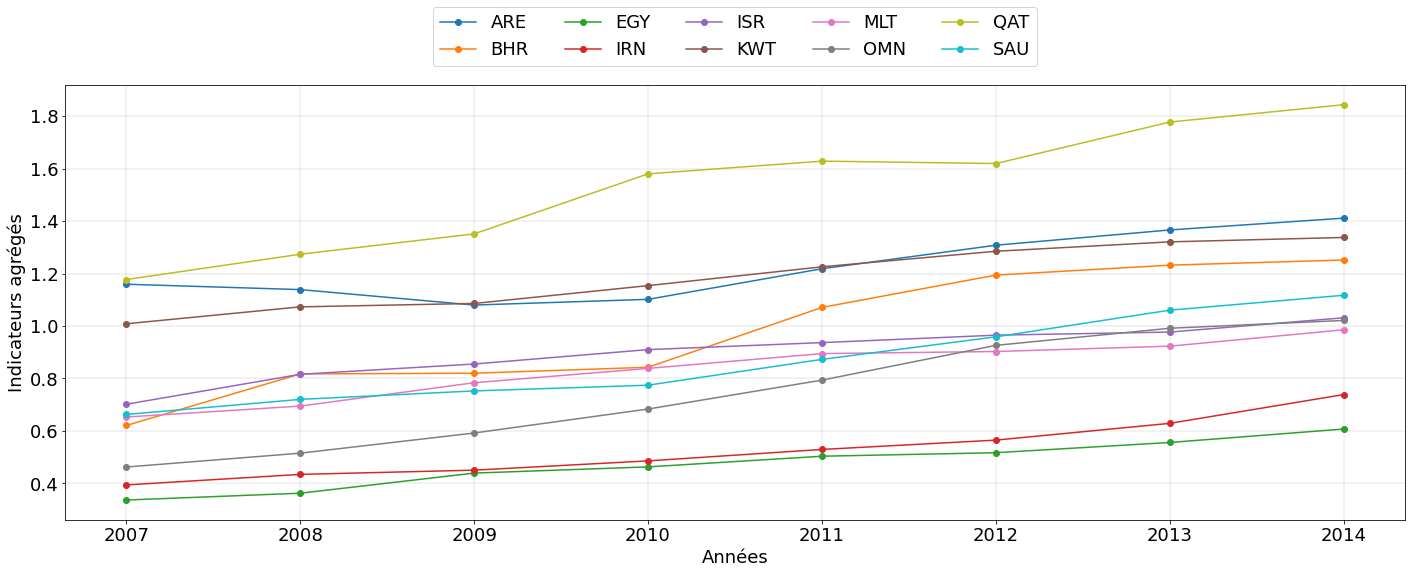

In [45]:
#========= Figure =======================================
figname  = 'FIGURES/Meddle_east_countries.jpeg'
figlegend= ME.columns
xlabel   = "Années"
ylabel   = "Indicateurs agrégés"
figtype  = "o"

ax       = plot_function(years1,ME, figtype, figname, xlabel ,ylabel,figlegend)

In [46]:
cc=df_country['Country Code'].isin(figlegend)
SN  = df_country['Short Name'][cc]
CN  = df_country['Country Code'][cc]
d = {'Code': CN,'Name': SN}

df_n = pd.DataFrame(data=d)
print(df_n)

    Code                  Name
6    ARE  United Arab Emirates
20   BHR               Bahrain
62   EGY                 Egypt
100  IRN                  Iran
103  ISR                Israel
115  KWT                Kuwait
146  MLT                 Malta
169  OMN                  Oman
183  QAT                 Qatar
188  SAU          Saudi Arabia


Le Qatar (QAT), le Kuwait (KWT) et l'Émirats Arabes Unis (ARE) sont les pays les plus appropriés pour la mise en œuvre du projet 

#### Région de l'est d'Asie et du Pacifique

In [47]:
EA = data_modif['Regions'].str.contains('East Asia')
EA = data_modif[EA]
EA=EA.T
EA=EA.drop(['Regions'], axis=0)
MEA =EA>EA.mean().mean()
EA=EA[MEA]
EA = EA.dropna(axis=1)

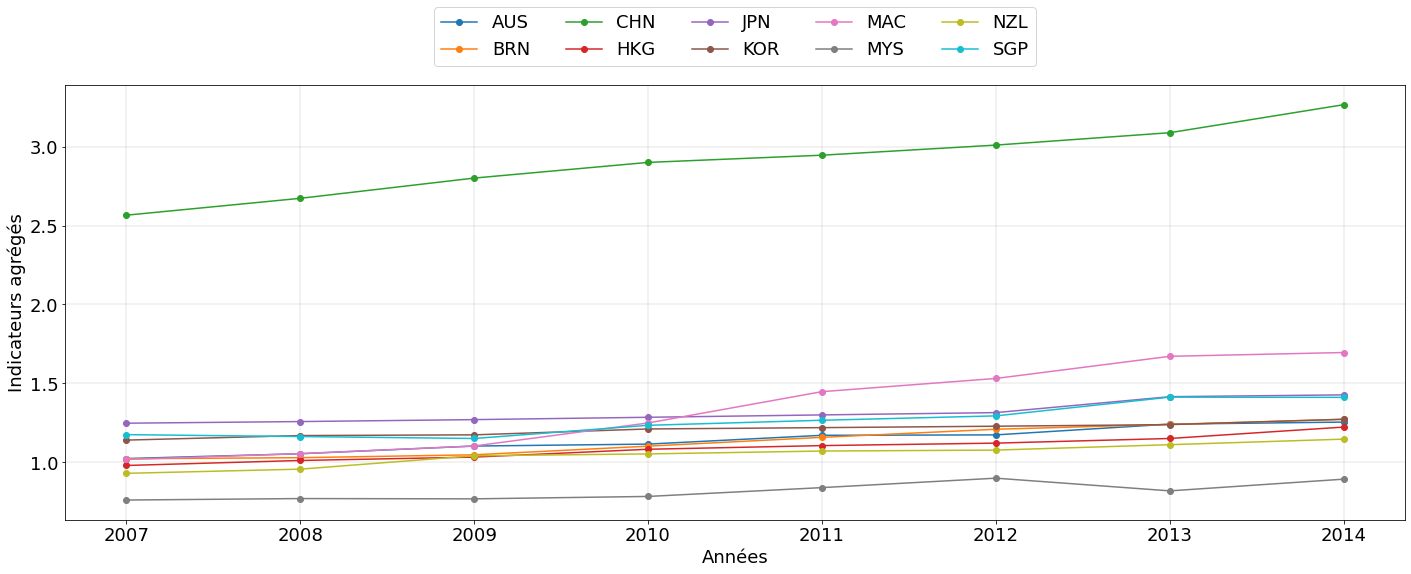

In [48]:
#========= Figure =======================================
figname  = 'FIGURES/east_asia_countries.jpeg'
figlegend= EA.columns
xlabel   = "Années"
ylabel   = "Indicateurs agrégés"
figtype  = "o"

ax       = plot_function(years1,EA, figtype, figname, xlabel ,ylabel,figlegend)

In [49]:
cc=df_country['Country Code'].isin(figlegend)
SN  = df_country['Short Name'][cc]
CN  = df_country['Country Code'][cc]
d = {'Code': CN,'Name': SN}

df_n = pd.DataFrame(data=d)
print(df_n)

    Code                  Name
11   AUS             Australia
29   BRN                Brunei
37   CHN                 China
90   HKG  Hong Kong SAR, China
107  JPN                 Japan
114  KOR                 Korea
133  MAC      Macao SAR, China
156  MYS              Malaysia
167  NZL           New Zealand
191  SGP             Singapore


Le Chine (CHN) et le Macao (MAC) sont les pays les plus appropriés pour la mise en œuvre du projet. 

#### Région de l'Asie du Sud

In [50]:
EA = data_modif['Regions'].str.contains('South Asia')
EA = data_modif[EA]
EA=EA.T
EA=EA.drop(['Regions'], axis=0)
# MEA =EA>EA.mean().mean()
# EA=EA[MEA]
# EA = EA.dropna(axis=1)

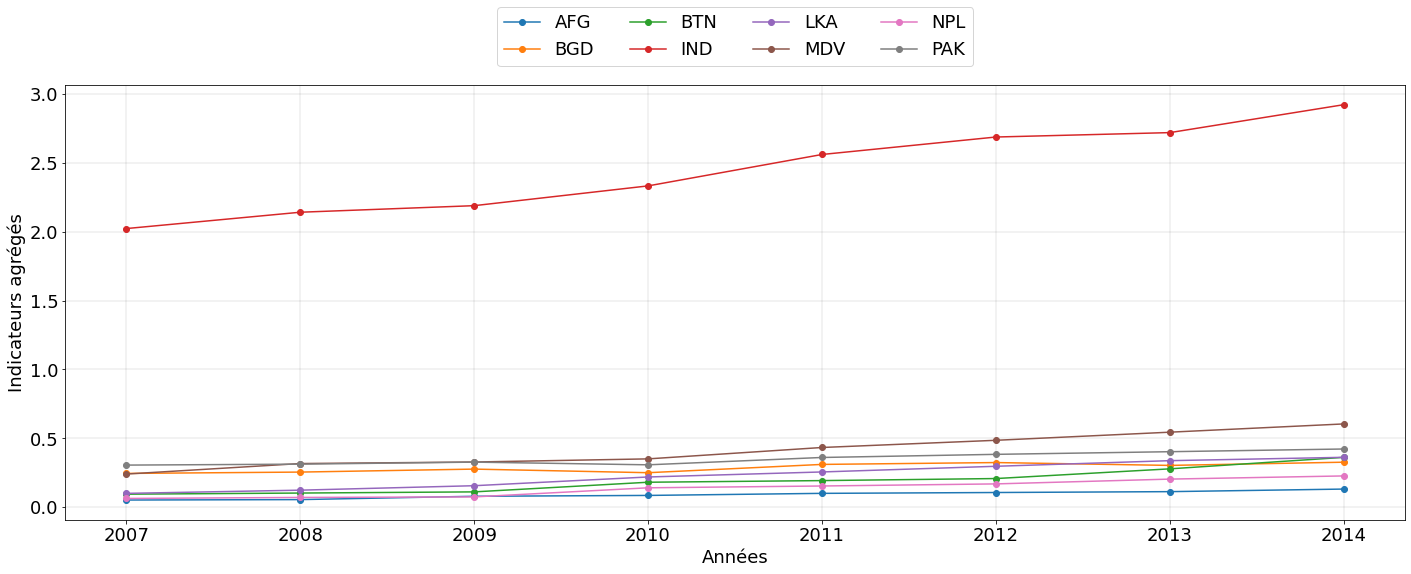

In [51]:
#========= Figure =======================================
figname  = 'FIGURES/south_asia_countries.jpeg'
figlegend= EA.columns
xlabel   = "Années"
ylabel   = "Indicateurs agrégés"
figtype  = "o"

ax       = plot_function(years1,EA, figtype, figname, xlabel ,ylabel,figlegend)

In [52]:
cc=df_country['Country Code'].isin(figlegend)
SN  = df_country['Short Name'][cc]
CN  = df_country['Country Code'][cc]
d = {'Code': CN,'Name': SN}

df_n = pd.DataFrame(data=d)
print(df_n)

    Code         Name
1    AFG  Afghanistan
18   BGD   Bangladesh
30   BTN       Bhutan
98   IND        India
126  LKA    Sri Lanka
139  MDV     Maldives
165  NPL        Nepal
170  PAK     Pakistan


L'Inde' (IND) est le pays le plus approprié pour la mise en œuvre du projet. 

#### La région Amérique latine et Caraïbes

In [53]:
EA = data_modif['Regions'].str.contains('Latin America & Caribbean')
EA = data_modif[EA]
EA=EA.T
EA=EA.drop(['Regions'], axis=0)
MEA =EA>1.1*EA.mean().mean()
EA=EA[MEA]
EA = EA.dropna(axis=1)

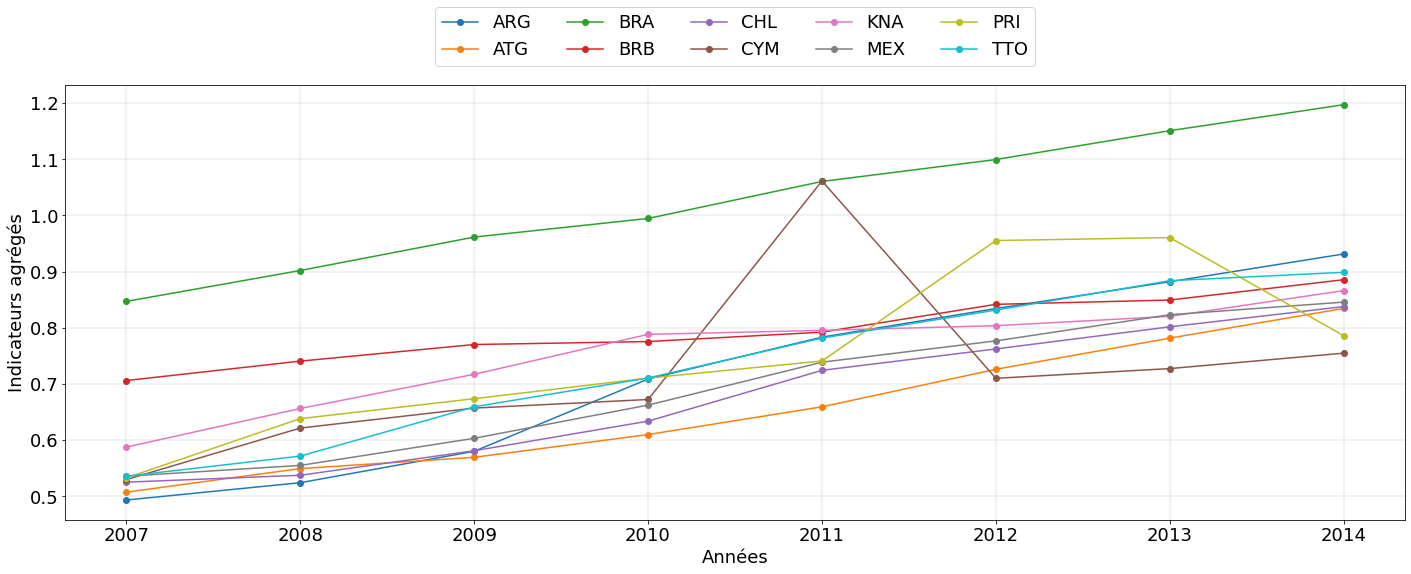

In [54]:
#========= Figure =======================================
figname  = 'FIGURES/Latino_america_countries.jpeg'
figlegend= EA.columns
xlabel   = "Années"
ylabel   = "Indicateurs agrégés"
figtype  = "o"

ax       = plot_function(years1,EA, figtype, figname, xlabel ,ylabel,figlegend)

In [55]:
cc=df_country['Country Code'].isin(figlegend)
SN  = df_country['Short Name'][cc]
CN  = df_country['Country Code'][cc]
d = {'Code': CN,'Name': SN}

df_n = pd.DataFrame(data=d)
print(df_n)

    Code                 Name
7    ARG            Argentina
10   ATG  Antigua and Barbuda
27   BRA               Brazil
28   BRB             Barbados
36   CHL                Chile
48   CYM       Cayman Islands
113  KNA  St. Kitts and Nevis
141  MEX               Mexico
177  PRI          Puerto Rico
218  TTO  Trinidad and Tobago


Le Brésil (BRA) apparait comme le meilleur pays pour la mise en œuvre du projet.

#### Région Afrique sub-saharienne

In [56]:
EA = data_modif['Regions'].str.contains('Sub-Saharan Africa')
EA = data_modif[EA]
EA=EA.T
EA=EA.drop(['Regions'], axis=0)
MEA =EA>0.77*EA.mean().mean()
EA=EA[MEA]
EA = EA.dropna(axis=1)

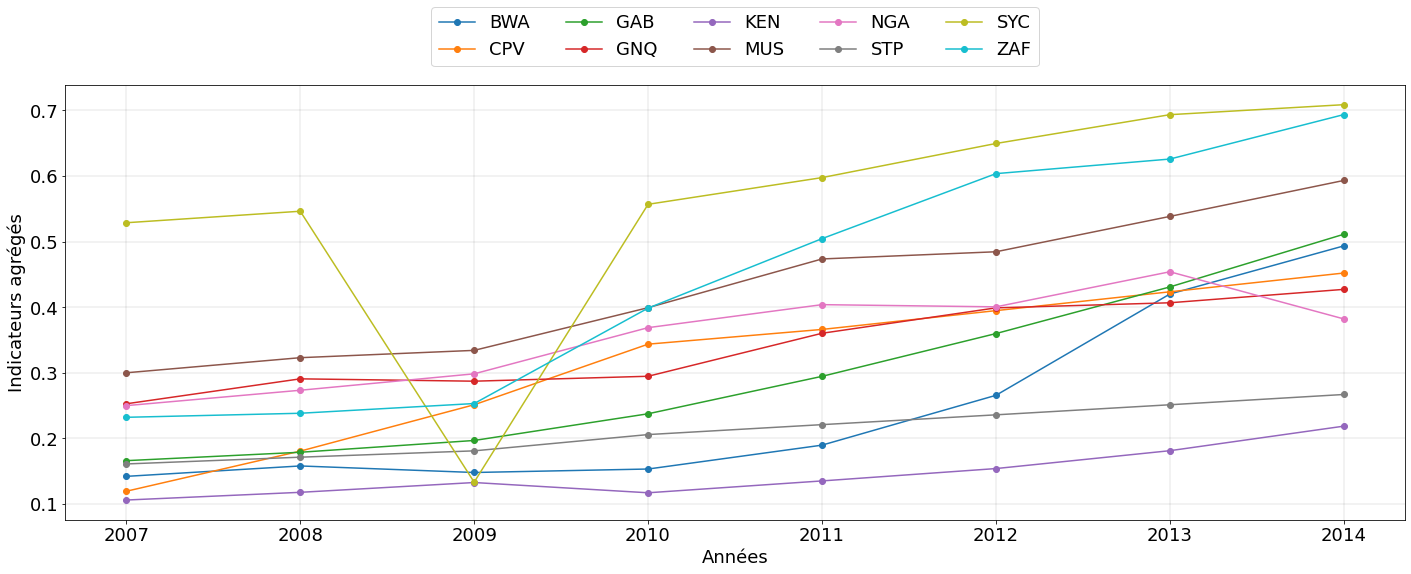

In [57]:
#========= Figure =======================================
figname  = 'FIGURES/Subsaharian_africa_countries.jpeg'
figlegend= EA.columns
xlabel   = "Années"
ylabel   = "Indicateurs agrégés"
figtype  = "o"

ax       = plot_function(years1,EA, figtype, figname, xlabel ,ylabel,figlegend)

In [58]:
cc=df_country['Country Code'].isin(figlegend)
SN  = df_country['Short Name'][cc]
CN  = df_country['Country Code'][cc]
d = {'Code': CN,'Name': SN}

df_n = pd.DataFrame(data=d)
print(df_n)

    Code                   Name
31   BWA               Botswana
44   CPV             Cabo Verde
74   GAB                  Gabon
82   GNQ      Equatorial Guinea
109  KEN                  Kenya
154  MUS              Mauritius
161  NGA                Nigeria
201  STP  São Tomé and Principe
208  SYC             Seychelles
238  ZAF           South Africa


L'Afrique du Sud (ZAF), Seychelles (SYC) et l'île Maurice (MUS) sont les pays les plus appropriés pour la mise en œuvre du projet. 

###  Les 10 meilleurs pays pour la mise en œuvre du projet

In [59]:
EA = data_modif
EA=EA.T
EA=EA.drop(['Regions'], axis=0)
MEA =EA>2.265*EA.mean().mean()     # 2.265 # 2.09 POUR LES 20 MEULLEURS 
EA=EA[MEA]
EA = EA.dropna(axis=1)
best_ten = EA.mean()
best_ten.sort_values(inplace=True, ascending=False)

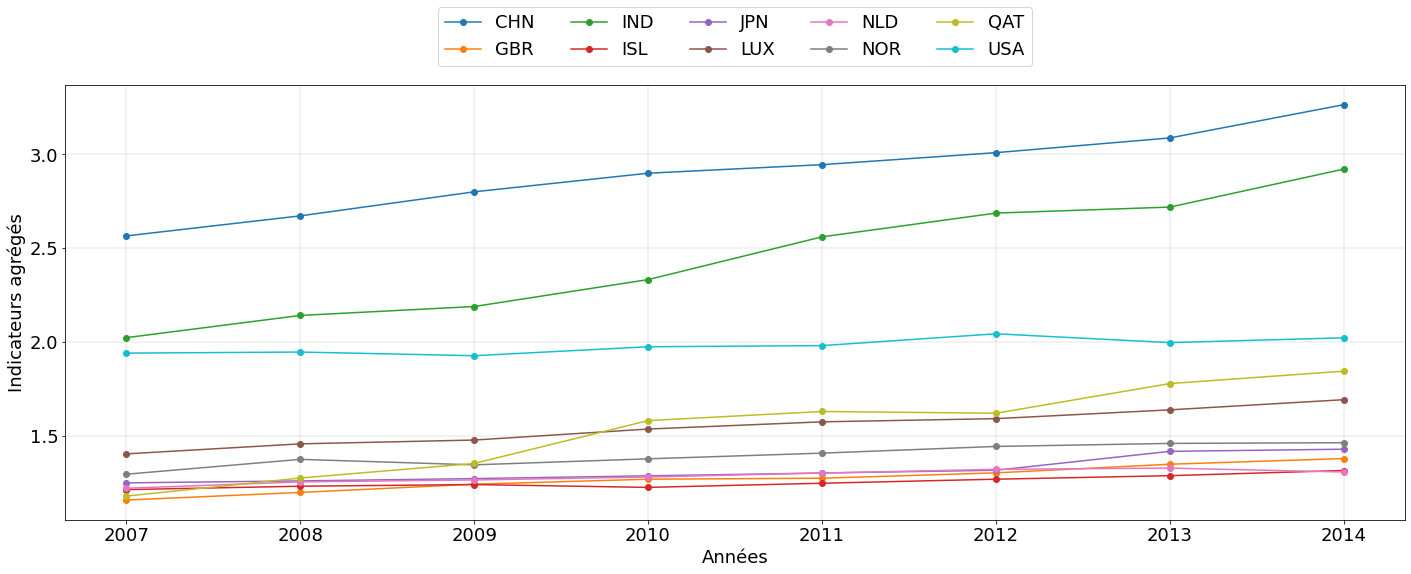

In [60]:
#========= Figure =======================================
figname  = 'FIGURES/ten_best_variability.jpeg'
figlegend= EA.columns
xlabel   = "Années"
ylabel   = "Indicateurs agrégés"
figtype  = "o"

ax       = plot_function(years1,EA, figtype, figname, xlabel ,ylabel,figlegend)

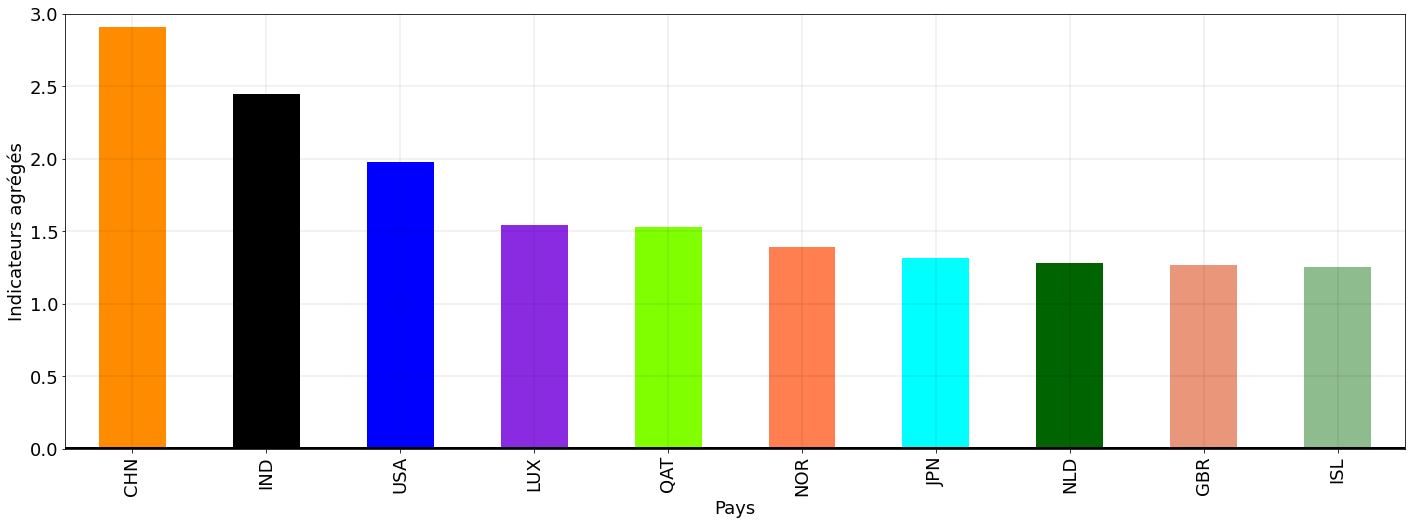

In [61]:

figure_name ='FIGURES/ten_best_Indic_agrege_countries.jpeg'

kind ="bar"
ylabel = "Indicateurs agrégés"
xlabel = "Pays"
c= [ 'darkorange',  'black', 'blue', 'blueviolet', 'chartreuse', 'coral',  'cyan', 'darkgreen', 'darksalmon', 'darkseagreen']#, 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen']
ymin=0.0
yrange =[0,3]
plot_bar_fixed_color(best_ten,kind,ylabel,xlabel,figure_name,c,yrange,ymin)



Chine (CHN), l'Inde (IND), les états-Unis d'Amérique (USA), le Luxembourg (LUX) et le Qatar (QAT) sont les premier 5 pays atractifs pour l'implementation de l'entreprise Academy.

###  Les 10 présentent le plus de potentiel pour la mise en œuvre de 'entreprise

In [62]:
listN=EA.columns 

growthrate= Cindicators[1].pct_change(axis='rows', periods=1)                               
growthrate=growthrate.drop(['2007'], axis=0)
growthrate.drop(growthrate.columns.difference(listN), 1, inplace=True)
Gindx     =growthrate[-3:]
Gindx     =Gindx.mean()



top_10 = pd.concat([Gindx, best_ten.reindex(Gindx.index)], axis=1)
top_10.rename(columns  = {0: "Croissance", 1: "Indicateurs agrégés"})

top_10.sort_values(by=[0], inplace=True, ascending=False)
top_10.rename(columns  = {0: "Taux de croissance", 1: "Indicateurs agrégés"})


,Taux de croissance,Indicateurs agrégés
CHN,8.98e-02,2.91
IND,6.99e-02,2.45
ISL,3.93e-02,1.25
GBR,3.88e-02,1.27
LUX,3.50e-02,1.55
JPN,3.27e-02,1.32
USA,3.12e-02,1.98
NLD,2.10e-02,1.28
NOR,1.96e-02,1.39
QAT,-5.25e-03,1.53


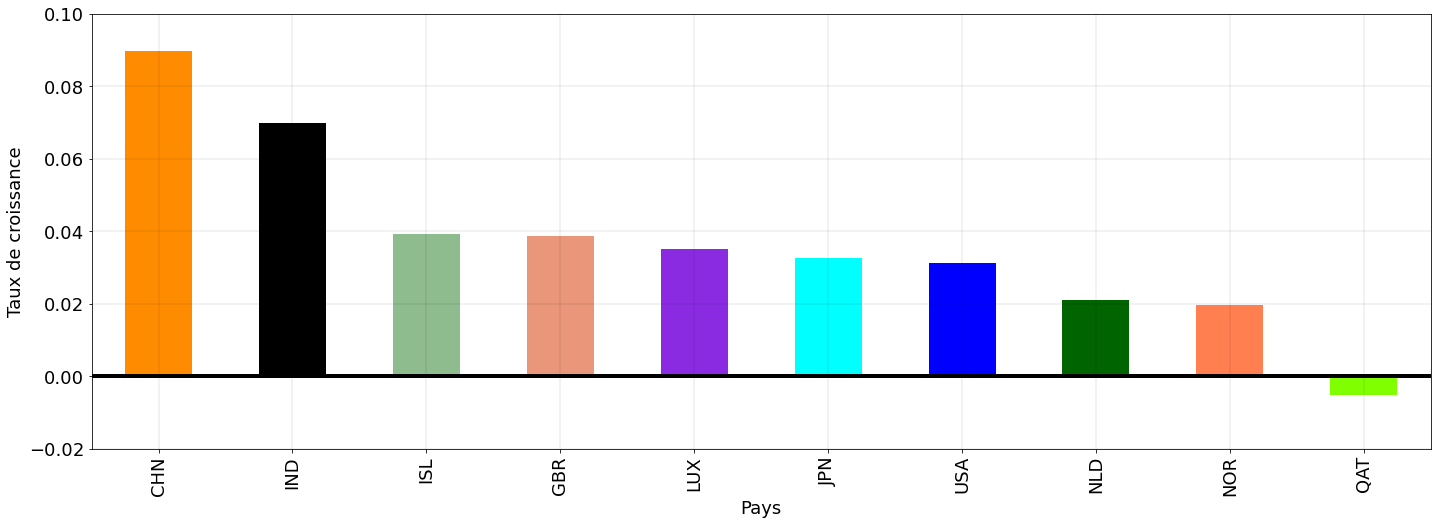

In [63]:
top_1 =top_10[0]
top_2 =top_10[1]
#========= Figure =======================================
figure_name ='FIGURES/ten_best_Indic_agrege_countries_ordered_by_taux_croissance.jpeg'
kind ="bar"
ylabel = "Taux de croissance"
xlabel = "Pays"
ymin=0.0
yrange =[-0.02,0.1]

c =['darkorange', 'black',  'darkseagreen', 'darksalmon', 'blueviolet',  'cyan', 'blue',  'darkgreen', 'coral', 'chartreuse']
plot_bar_fixed_color(top_1,kind,ylabel,xlabel,figure_name,c,yrange,ymin)


Compte tenu de la variation du taux de croissance du PIB entre 2012-2014, la Chine, l'Inde, l'Island, la Grande-Bretagne  et le Luxembourg semblent être les premier 5 pays qui présentent le plus de potentiel pour la mise en œuvre des activités.

# Conclusion
Pas d’intérêt d’implementer le projet par région géographique. La Chine, l’Inde, l’Islands, la Grande-Bretagne et le Luxembourg sont les 5 pays avec un fort potentielle pour l’implementation du projet.

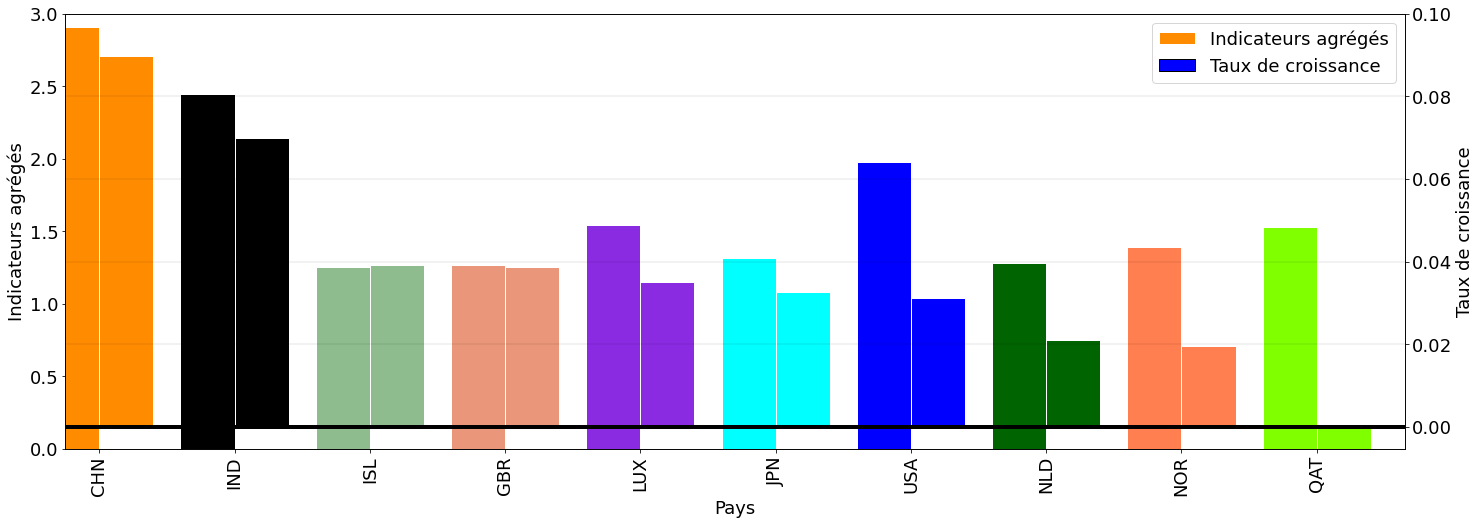

In [64]:
y2label = "Taux de croissance"
y1label = "Indicateurs agrégés"
xlabel = "Pays"
kind ="bar"
ymin=0.0
y1range =[0,3]
y2range=0.1
loc='upper right'
figure_name ='FIGURES/ten_best_Indic_agrege_taux_croissance_countries_ordered_by_taux_croissance.jpeg'

c =['darkorange', 'black',  'darkseagreen', 'darksalmon', 'blueviolet',  'cyan', 'blue',  'darkgreen', 'coral', 'chartreuse']
plot_bar_fixed_color_twins(top_2,top_1,kind,y1label,y2label,xlabel,figure_name,c,y1range,y2range,ymin,loc)
